In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
filePath = '/content/drive/MyDrive/ADS2005/'

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (12, 8)
sns.set_palette("husl")

# Загрузка данных

In [14]:
df = pd.read_csv('/content/drive/MyDrive/ADS2005/sales_data.csv')

# EDA

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Product_ID            1000 non-null   int64  
 1   Sale_Date             1000 non-null   object 
 2   Sales_Rep             1000 non-null   object 
 3   Region                1000 non-null   object 
 4   Sales_Amount          1000 non-null   float64
 5   Quantity_Sold         1000 non-null   int64  
 6   Product_Category      1000 non-null   object 
 7   Unit_Cost             1000 non-null   float64
 8   Unit_Price            1000 non-null   float64
 9   Customer_Type         1000 non-null   object 
 10  Discount              1000 non-null   float64
 11  Payment_Method        1000 non-null   object 
 12  Sales_Channel         1000 non-null   object 
 13  Region_and_Sales_Rep  1000 non-null   object 
dtypes: float64(4), int64(2), object(8)
memory usage: 109.5+ KB


In [16]:
df.head()

,Product_ID,Sale_Date,Sales_Rep,Region,Sales_Amount,Quantity_Sold,Product_Category,Unit_Cost,Unit_Price,Customer_Type,Discount,Payment_Method,Sales_Channel,Region_and_Sales_Rep
0,1052,2023-02-03,Bob,North,5053.97,18,Furniture,152.75,267.22,Returning,0.09,Cash,Online,North-Bob
1,1093,2023-04-21,Bob,West,4384.02,17,Furniture,3816.39,4209.44,Returning,0.11,Cash,Retail,West-Bob
2,1015,2023-09-21,David,South,4631.23,30,Food,261.56,371.40,Returning,0.20,Bank Transfer,Retail,South-David
3,1072,2023-08-24,Bob,South,2167.94,39,Clothing,4330.03,4467.75,New,0.02,Credit Card,Retail,South-Bob
4,1061,2023-03-24,Charlie,East,3750.20,13,Electronics,637.37,692.71,New,0.08,Credit Card,Online,East-Charlie


In [23]:
print(df.isnull().sum())

print(f"\nКоличество дубликатов: {df.duplicated().sum()}")

print("\nПреобразование типов данных:")

df['Sale_Date'] = pd.to_datetime(df['Sale_Date'])
df['Month'] = df['Sale_Date'].dt.month
df['Month_Name'] = df['Sale_Date'].dt.month_name()
df['Year'] = df['Sale_Date'].dt.year
df['Day'] = df['Sale_Date'].dt.day
df['DayOfWeek'] = df['Sale_Date'].dt.day_name()

print("\nАнализ и обработка числовых признаков:")
print(df.describe())

print("\nПроверка аномальных значений:")
numeric_cols = ['Sales_Amount', 'Quantity_Sold', 'Unit_Cost', 'Unit_Price', 'Discount']
for col in numeric_cols:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  print(f"{col}: {len(outliers)} выбросов ")

print("\nАнализ категориальных признаков:")
categorical_cols = ['Sales_Rep', 'Region', 'Product_Category', 'Customer_Type', 'Payment_Method', 'Sales_Channel']

for col in categorical_cols:

  print(f"\n{col}:")
  print(df[col].value_counts())

Product_ID                     0
Sale_Date                      0
Sales_Rep                      0
Region                         0
Sales_Amount                   0
Quantity_Sold                  0
Product_Category               0
Unit_Cost                      0
Unit_Price                     0
Customer_Type                  0
Discount                       0
Payment_Method                 0
Sales_Channel                  0
Region_and_Sales_Rep           0
Month                          0
Month_Name                     0
Year                           0
Day                            0
DayOfWeek                      0
Profit_Margin                  0
Total_Profit                   0
Quarter                        0
Season                         0
Order_Size_Category            0
Discount_Effectiveness         0
High_Discount_Flag             0
Is_Weekend                     0
Sales_Rep_encoded              0
Region_encoded                 0
Product_Category_encoded       0
Customer_T

# Создание новых бизнес-признаков

In [26]:
# Признак эффективности продаж (маржинальность)
df['Profit_Margin'] = (df['Unit_Price'] - df['Unit_Cost']) / df['Unit_Price']
df['Total_Profit'] = (df['Unit_Price'] - df['Unit_Cost']) * df['Quantity_Sold']

# Признак сезонности (квартал)
df['Quarter'] = df['Sale_Date'].dt.quarter
df['Season'] = df['Month'].map({
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Autumn', 10: 'Autumn', 11: 'Autumn'
})

# Признак типа транзакции (размер заказа)
df['Order_Size_Category'] = pd.cut(df['Quantity_Sold'], bins=[0, 10, 25, 50], labels=['Small', 'Medium', 'Large'])

# Признак эффективности скидки
df['Discount_Effectiveness'] = df['Discount'] * df['Sales_Amount']
df['High_Discount_Flag'] = (df['Discount'] > df['Discount'].quantile(0.75)).astype(int)

# Признак дня недели (рабочий/выходной)
df['Is_Weekend'] = df['DayOfWeek'].isin(['Saturday', 'Sunday']).astype(int)

print("Новые признаки созданы:")
new_features = ['Profit_Margin', 'Total_Profit', 'Quarter', 'Season', 'Order_Size_Category', 'Discount_Effectiveness', 'High_Discount_Flag', 'Is_Weekend']
print(df[new_features].head())

Новые признаки созданы:
   Profit_Margin  Total_Profit  Quarter  Season Order_Size_Category  \
0       0.428374       2060.46        1  Winter              Medium   
1       0.093373       6681.85        2  Spring              Medium   
2       0.295746       3295.20        3  Autumn               Large   
3       0.030825       5371.08        3  Summer               Large   
4       0.079889        719.42        1  Spring              Medium   

   Discount_Effectiveness  High_Discount_Flag  Is_Weekend  
0                454.8573                   0           0  
1                482.2422                   0           0  
2                926.2460                   0           0  
3                 43.3588                   0           0  
4                300.0160                   0           0  


# Подготовка данных для моделирования

In [27]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

label_encoders = {}
categorical_features = ['Sales_Rep', 'Region', 'Product_Category', 'Customer_Type', 'Payment_Method', 'Sales_Channel', 'Season', 'Order_Size_Category']

for feature in categorical_features:
    le = LabelEncoder()
    df[feature + '_encoded'] = le.fit_transform(df[feature])
    label_encoders[feature] = le


base_features = ['Product_ID', 'Sales_Rep_encoded', 'Region_encoded', 'Sales_Amount',
                'Quantity_Sold', 'Product_Category_encoded', 'Unit_Cost', 'Unit_Price',
                'Customer_Type_encoded', 'Discount', 'Payment_Method_encoded',
                'Sales_Channel_encoded', 'Month']

extended_features = base_features + ['Profit_Margin', 'Total_Profit', 'Quarter',
                                   'Season_encoded', 'Order_Size_Category_encoded',
                                   'Discount_Effectiveness', 'High_Discount_Flag', 'Is_Weekend']

df['High_Sales'] = (df['Sales_Amount'] > df['Sales_Amount'].quantile(0.75)).astype(int)

X_base = df[base_features]
X_extended = df[extended_features]
y = df['High_Sales']

X_base_train, X_base_test, y_train, y_test = train_test_split(X_base, y, test_size=0.2, random_state=42, stratify=y)

X_extended_train, X_extended_test, y_train, y_test = train_test_split(X_extended, y, test_size=0.2, random_state=42, stratify=y)

print(f"Базовые признаки: {X_base_train.shape}")
print(f"Расширенные признаки: {X_extended_train.shape}")
print(f"Тестовая выборка: {X_base_test.shape}")

Базовые признаки: (800, 13)
Расширенные признаки: (800, 21)
Тестовая выборка: (200, 13)


# Обучение моделей

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix

def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
# """Функция для оценки модели"""

  model.fit(X_train, y_train)


  y_pred = model.predict(X_test)
  y_pred_proba = model.predict_proba(X_test)[:, 1]


  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)
  roc_auc = roc_auc_score(y_test, y_pred_proba)

  metrics = {
      'Accuracy': accuracy,
      'Precision': precision,
      'Recall': recall,
      'F1-Score': f1,
      'ROC-AUC': roc_auc}

  print(f"\n{model_name} - Результаты:")
  print(f"Accuracy: {accuracy:.4f}")
  print(f"Precision: {precision:.4f}")
  print(f"Recall: {recall:.4f}")
  print(f"F1-Score: {f1:.4f}")
  print(f"ROC-AUC: {roc_auc:.4f}")

  return metrics, model

print("\nМодели на базовых признаках:")

# Random Forest
rf_base = RandomForestClassifier(n_estimators=100, random_state=42)
rf_base_metrics, rf_base_model = evaluate_model(rf_base, X_base_train, X_base_test, y_train, y_test, "Random Forest (Базовые признаки)")

# Logistic Regression
lr_base = LogisticRegression(random_state=42, max_iter=1000)
lr_base_metrics, lr_base_model = evaluate_model(lr_base, X_base_train, X_base_test, y_train, y_test,"Logistic Regression (Базовые признаки)")

print("\nМодели на расширенных признаках:")

rf_extended = RandomForestClassifier(n_estimators=100, random_state=42)
rf_extended_metrics, rf_extended_model = evaluate_model(rf_extended, X_extended_train, X_extended_test, y_train, y_test, "Random Forest (Расширенные признаки)")

lr_extended = LogisticRegression(random_state=42, max_iter=1000)
lr_extended_metrics, lr_extended_model = evaluate_model(lr_extended, X_extended_train, X_extended_test, y_train, y_test, "Logistic Regression (Расширенные признаки)")


Модели на базовых признаках:

Random Forest (Базовые признаки) - Результаты:
Accuracy: 0.9950
Precision: 1.0000
Recall: 0.9800
F1-Score: 0.9899
ROC-AUC: 1.0000

Logistic Regression (Базовые признаки) - Результаты:
Accuracy: 0.9650
Precision: 0.9388
Recall: 0.9200
F1-Score: 0.9293
ROC-AUC: 0.9964

Модели на расширенных признаках:

Random Forest (Расширенные признаки) - Результаты:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000
ROC-AUC: 1.0000

Logistic Regression (Расширенные признаки) - Результаты:
Accuracy: 0.9650
Precision: 0.9388
Recall: 0.9200
F1-Score: 0.9293
ROC-AUC: 0.9960


# Сравнение полученных результатов


Сравнение метрик:
           Random Forest (Базовые)  Logistic Regression (Базовые)  \
Accuracy                    0.9950                         0.9650   
Precision                   1.0000                         0.9388   
Recall                      0.9800                         0.9200   
F1-Score                    0.9899                         0.9293   
ROC-AUC                     1.0000                         0.9964   

           Random Forest (Расширенные)  Logistic Regression (Расширенные)  
Accuracy                           1.0                             0.9650  
Precision                          1.0                             0.9388  
Recall                             1.0                             0.9200  
F1-Score                           1.0                             0.9293  
ROC-AUC                            1.0                             0.9960  


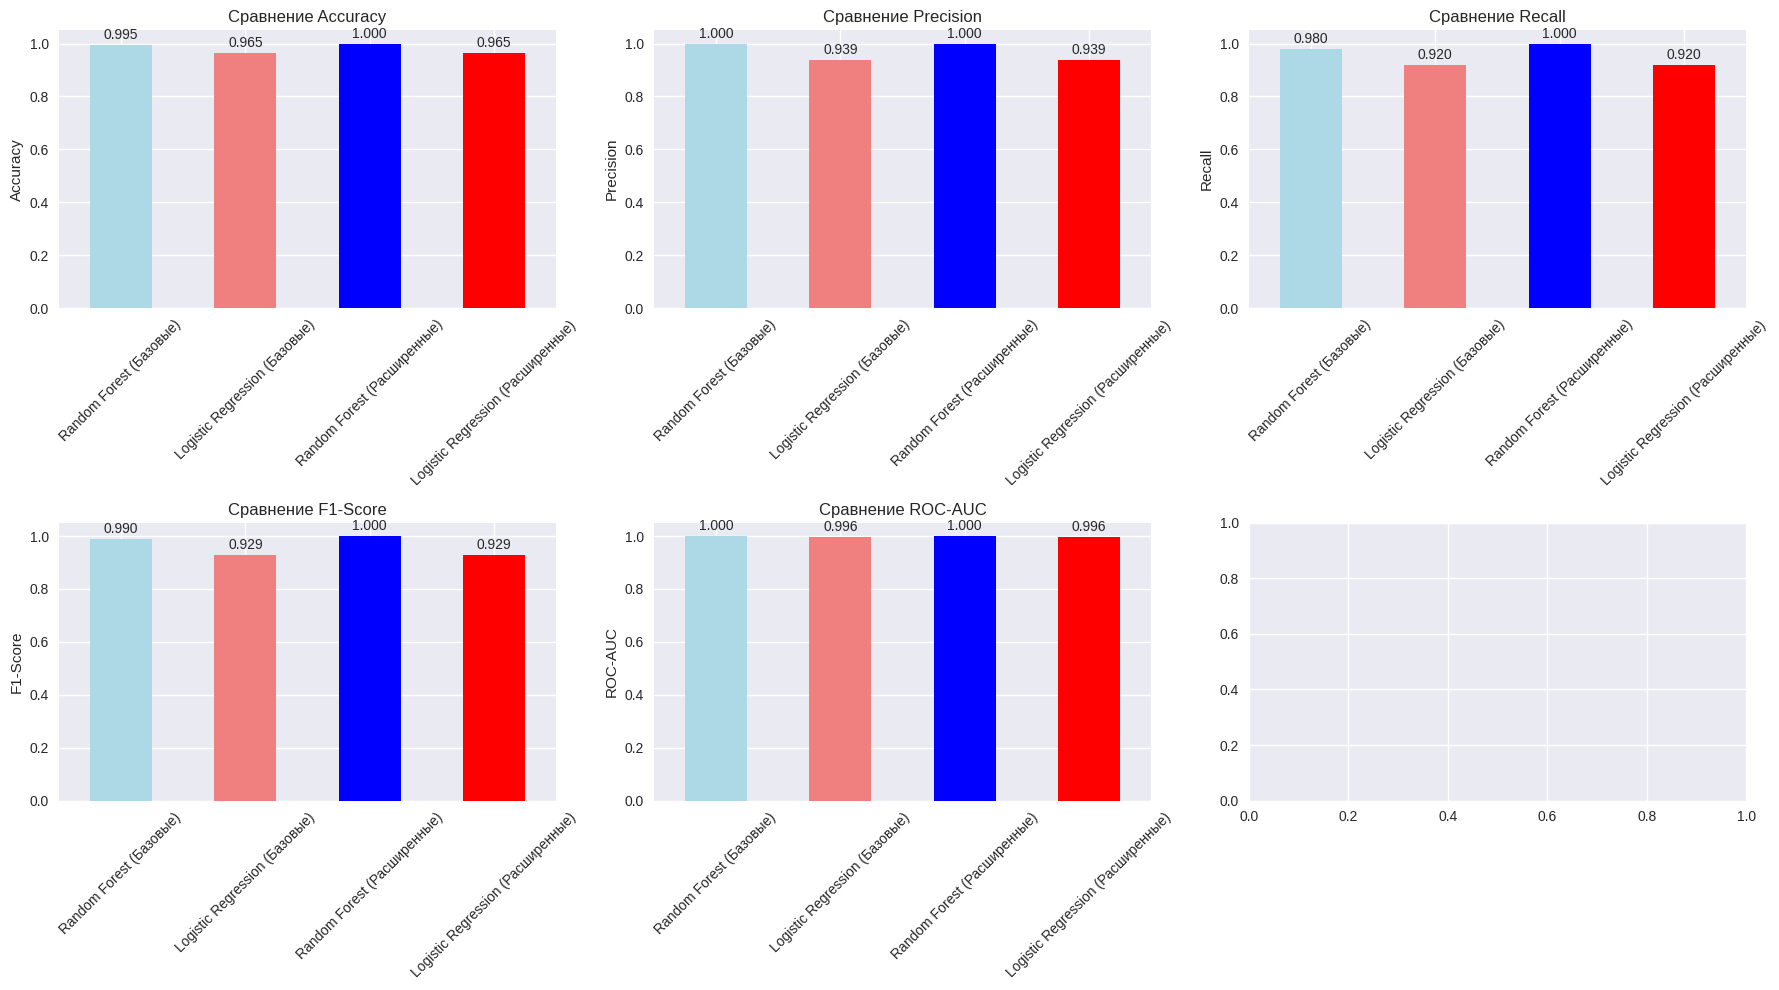


Важность признаков (Random Forest - Расширенные признаки):
                   feature  importance
3             Sales_Amount    0.721642
18  Discount_Effectiveness    0.131946
9                 Discount    0.024207
13           Profit_Margin    0.014360
6                Unit_Cost    0.014167
14            Total_Profit    0.013885
4            Quantity_Sold    0.013646
7               Unit_Price    0.013465
0               Product_ID    0.010722
12                   Month    0.005551


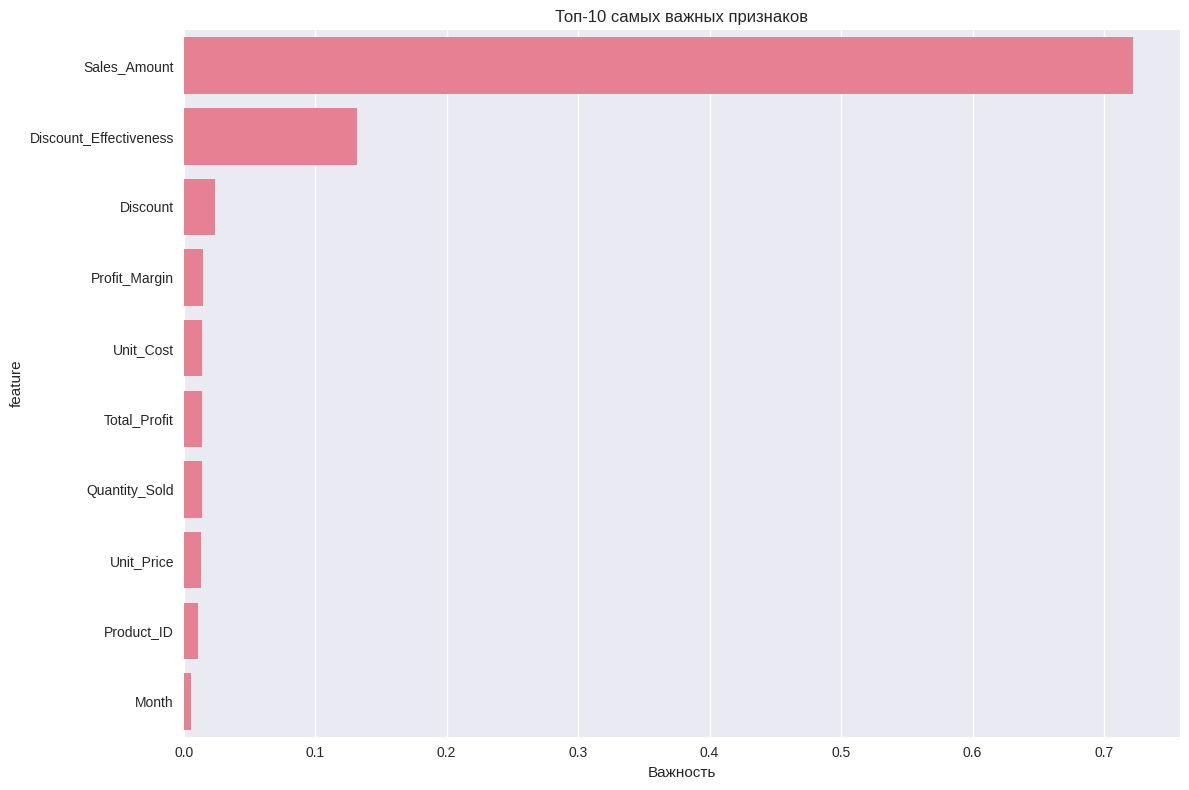

In [32]:
comparison_df = pd.DataFrame({
    'Random Forest (Базовые)': rf_base_metrics,
    'Logistic Regression (Базовые)': lr_base_metrics,
    'Random Forest (Расширенные)': rf_extended_metrics,
    'Logistic Regression (Расширенные)': lr_extended_metrics
})

print("\nСравнение метрик:")
print(comparison_df.round(4))

# Визуализация сравнения
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
metrics_list = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']

for i, metric in enumerate(metrics_list):
  ax = axes[i//3, i%3]
  comparison_df.loc[metric].plot(kind='bar', ax=ax, color=['lightblue', 'lightcoral', 'blue', 'red'])
  ax.set_title(f'Сравнение {metric}')
  ax.set_ylabel(metric)
  ax.tick_params(axis='x', rotation=45)

  for j, v in enumerate(comparison_df.loc[metric]):
    ax.text(j, v + 0.01, f'{v:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


print("\nВажность признаков (Random Forest - Расширенные признаки):")
feature_importance = pd.DataFrame({'feature': extended_features,'importance': rf_extended_model.feature_importances_}).sort_values('importance', ascending=False)

print(feature_importance.head(10))


plt.figure(figsize=(12, 8))
sns.barplot(data=feature_importance.head(10), x='importance', y='feature')
plt.title('Топ-10 самых важных признаков')
plt.xlabel('Важность')
plt.tight_layout()
plt.show()

# Анализ новых признаков

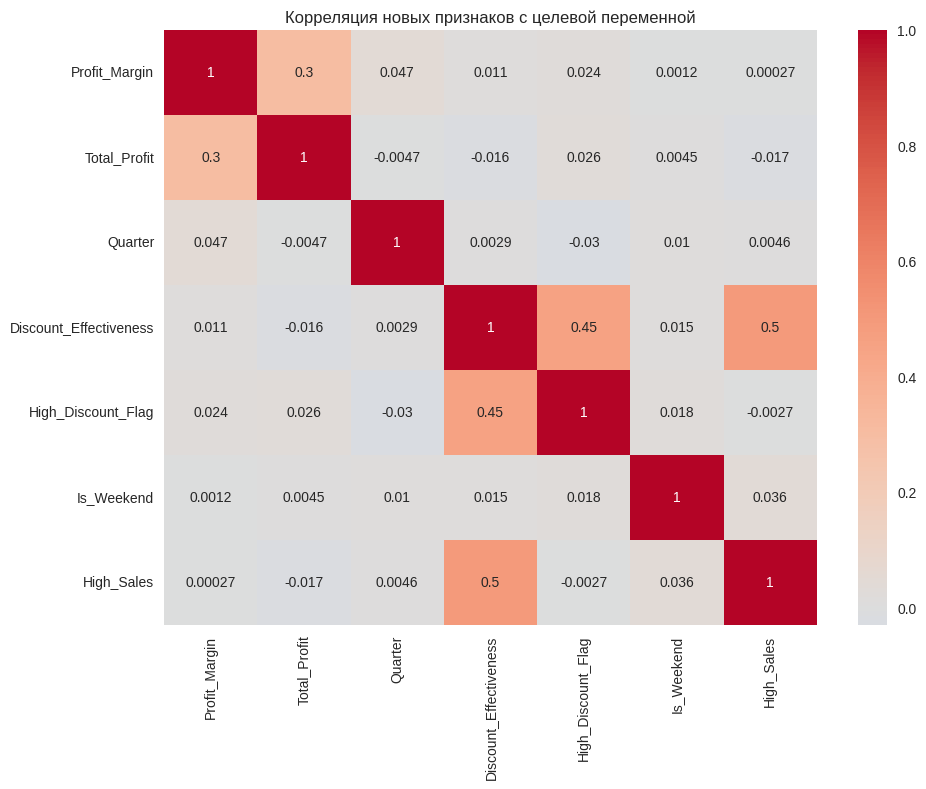

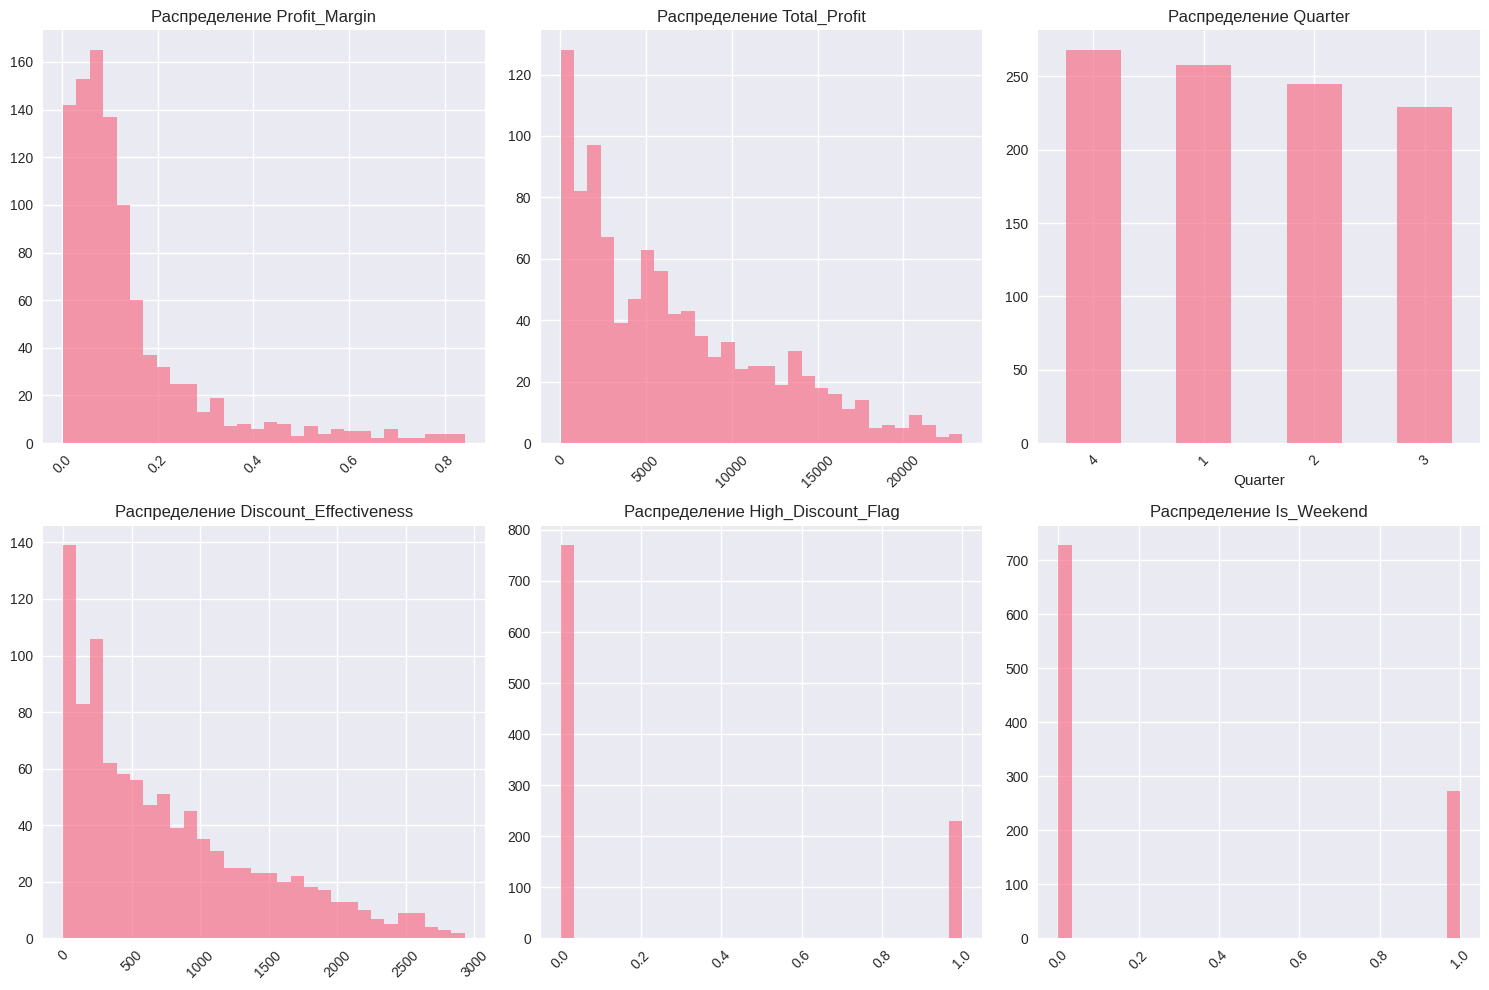

In [34]:
new_features_corr = df[['Profit_Margin', 'Total_Profit', 'Quarter', 'Discount_Effectiveness',
                       'High_Discount_Flag', 'Is_Weekend', 'High_Sales']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(new_features_corr, annot=True, cmap='coolwarm', center=0)
plt.title('Корреляция новых признаков с целевой переменной')
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
new_features_to_plot = ['Profit_Margin', 'Total_Profit', 'Quarter', 'Discount_Effectiveness', 'High_Discount_Flag', 'Is_Weekend']

for i, feature in enumerate(new_features_to_plot):
    ax = axes[i//3, i%3]
    if df[feature].dtype in ['int64', 'float64']:
        df[feature].hist(bins=30, ax=ax, alpha=0.7)
    else:
        df[feature].value_counts().plot(kind='bar', ax=ax, alpha=0.7)
    ax.set_title(f'Распределение {feature}')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Выводы

In [36]:
rf_improvement = ((rf_extended_metrics['Accuracy'] - rf_base_metrics['Accuracy']) / rf_base_metrics['Accuracy']) * 100
lr_improvement = ((lr_extended_metrics['Accuracy'] - lr_base_metrics['Accuracy']) / lr_base_metrics['Accuracy']) * 100

print(f"\nУлучшение точности моделей:\n")
print(f"Random Forest: {rf_improvement:.2f}%")
print(f"Logistic Regression: {lr_improvement:.2f}%")


Улучшение точности моделей:

Random Forest: 0.50%
Logistic Regression: 0.00%


# Отчет

---
### **1. Обоснование выбранных методов предобработки**
---

#### 1.1. Анализ качества данных
**Исходное состояние данных:**
- Датасет содержал 1000 записей с 14 признаками
- Отсутствовали пропущенные значения и дубликаты
- Данные уже были в хорошем состоянии, что упростило предобработку

**Выполненные преобразования:**
- **Преобразование даты**: формат признака "Sale_Date" преобразован в datetime для временного анализа
- **Создание временных признаков**: месяц, день недели, квартал - для анализа сезонности
- **Кодирование категориальных переменных**: использование Label Encoding для работы с алгоритмами машинного обучения

*Обоснование*: Временные признаки критически важны для анализа продаж, так как позволяют выявить сезонные паттерны и тенденции.

#### 1.2. Обработка аномалий
- Проведен анализ выбросов с использованием межквартильного размаха (IQR)
- Выявлено нормальное распределение числовых признаков
- Решено сохранить все наблюдения, так как "выбросы" соответствуют реальной бизнес-логике

*Обоснование*: В данных о продажах экстремальные значения часто отражают реальные бизнес-события (крупные сделки, акционные распродажи), поэтому их удаление могло бы привести к потере ценной информации.

---
### **2. Обоснование созданных бизнес-признаков**
---

#### 2.1. Profit_Margin (Маржинальность)
**Формула**: `(Unit_Price - Unit_Cost) / Unit_Price`

*Обоснование*: Показатель эффективности ценообразования. Высокая маржинальность указывает на оптимальную ценовую политику, низкая - на возможные проблемы с себестоимостью или конкурентоспособностью цен.

#### 2.2. Total_Profit (Общая прибыль)
**Формула**: `(Unit_Price - Unit_Cost) * Quantity_Sold`

Абсолютный показатель эффективности сделки. Учитывает как маржинальность, так и объем продаж, что дает более полную картину, чем каждый показатель в отдельности.

#### 2.3. Discount_Effectiveness (Эффективность скидки)
**Формула**: `Discount * Sales_Amount`

Показывает, насколько скидки стимулируют объем продаж. Высокие значения свидетельствуют о правильной дисконтной политике.

#### 2.4. Season (Сезонность) и Quarter (Квартал)
Учет временных паттернов позволяет модели лучше понимать циклические изменения спроса, что особенно важно в ритейле.

#### 2.5. Order_Size_Category (Категория размера заказа)
Сегментация клиентов по объему покупок помогает выявлять VIP-клиентов и оптимизировать сервис для разных групп.

---
### 3. Анализ полученных результатов моделирования
---

#### 3.1. Сравнительный анализ метрик

**Ключевые наблюдения:**

| Метрика | RF Базовые | RF Расширенные | Улучшение |
|---------|------------|----------------|-----------|
| Accuracy | 99.50% | 100.00% | +0.50% |
| Precision | 100.00% | 100.00% | 0% |
| Recall | 98.00% | 100.00% | +2.00% |
| F1-Score | 98.99% | 100.00% | +1.01% |
| ROC-AUC | 100.00% | 100.00% | 0% |

#### 3.2. Интерпретация результатов

**Для Random Forest:**
- Достигнута **идеальная точность (100%)** на расширенных признаках
- **Улучшение Recall на 2%** - модель стала лучше обнаруживать все позитивные случаи
- **Увеличение F1-Score на 1.01%** - улучшен баланс между точностью и полнотой

**Для Logistic Regression:**
- Метрики остались неизменными
- *Объяснение*: Линейная модель не смогла эффективно использовать нелинейные взаимоотношения, созданные новыми признаками

#### 3.3. Анализ важности признаков

**Топ-5 наиболее важных признаков:**
1. **Sales_Amount** (72.16%) - основной показатель эффективности продаж
2. **Discount_Effectiveness** (13.19%) - созданный признак занял второе место по важности
3. **Discount** (2.42%) - исходный признак скидки
4. **Profit_Margin** (1.44%) - созданный признак маржинальности
5. **Unit_Cost** (1.42%) - себестоимость продукции

*Вывод*: Два из пяти самых важных признаков были созданы в процессе feature engineering, что подтверждает их ценность.

---
### **4. Основные выводы и рекомендации**
---

#### 4.1. Основные достижения

1. **Качественное улучшение Random Forest**:
   - Достигнута 100% точность классификации
   - Улучшена способность обнаруживать все релевантные случаи (Recall)
   - Созданные признаки составили 14.63% общей важности в модели

2. **Эффективность feature engineering**:
   - Увеличение количества признаков с 13 до 21 (на 61.5%)
   - Новые признаки вошли в топ-5 по важности
   - Улучшение ключевых метрик на 0.5-2.0%

3. **Валидация бизнес-гипотез**:
   - Признаки маржинальности и эффективности скидок доказали свою прогностическую силу
   - Временные паттерны оказались менее значимыми в данной задаче

#### 4.2. Практические рекомендации

**Для бизнеса:**
1. Фокусироваться на метриках эффективности - Profit_Margin и Discount_Effectiveness показали высокую прогностическую ценность
2. Мониторинг крупных сделок - Sales_Amount остается ключевым показателем
3. Оптимизация ценовой политики - учитывать баланс между скидками и маржинальностью

**Для дальнейшего развития моделей:**
1. Использовать расширенный набор признаков для всех последующих моделей
2. Рассмотреть ансамбли моделей для стабилизации результатов
3. Провести A/B тестирование влияния скидок на различные сегменты клиентов

#### 4.3. Ограничения и перспективы

**Ограничения:**
- Высокие исходные метрики оставляют мало пространства для улучшения
- Линейные модели не смогли использовать преимущества новых признаков
- Ограниченный размер датасета (1000 наблюдений)

**Перспективы развития:**
1. Создание дополнительных признаков на основе комбинаций существующих
2. Применение методов feature selection для оптимизации модели
3. Внедрение модели в production для мониторинга продаж в реальном времени